<a href="https://colab.research.google.com/github/dhruvitshah19/Annuity_Calc/blob/main/Microsoft_Mean_Reversion_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
files.upload()

Saving MSFT.csv to MSFT.csv


{'MSFT.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2021-11-01,331.359985,331.489990,326.369995,329.369995,323.509064,27073200\n2021-11-02,330.309998,333.450012,330.000000,333.130005,327.202148,26487100\n2021-11-03,333.899994,334.899994,330.649994,334.000000,328.056702,21500100\n2021-11-04,332.890015,336.540009,329.510010,336.440002,330.453278,23992200\n2021-11-05,338.510010,338.790009,334.420013,336.059998,330.080017,22570100\n2021-11-08,337.299988,337.649994,334.440002,336.989990,330.993469,20897000\n2021-11-09,337.109985,338.720001,334.529999,335.950012,329.972046,21307400\n2021-11-10,334.570007,334.630005,329.920013,330.799988,324.913605,25500900\n2021-11-11,331.250000,333.769989,330.510010,332.429993,326.514618,16849800\n2021-11-12,333.920013,337.230011,333.790009,336.720001,330.728271,23831000\n2021-11-15,337.540009,337.880005,334.029999,336.070007,330.089905,16723000\n2021-11-16,335.679993,340.670013,335.510010,339.510010,333.468658,20886800\n2021-11-17,338.940002,342.1900

In [ ]:
#Read the data
df= pd.read_csv('MSFT.csv')
#Set the Data as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Remove or drop the Date column
df.drop(['Date'], inplace = True, axis = 1)
#Show the data
df

,Open,High,Low,Close,Adj Close,Volume
2021-11-01,331.359985,331.489990,326.369995,329.369995,323.509064,27073200
2021-11-02,330.309998,333.450012,330.000000,333.130005,327.202148,26487100
2021-11-03,333.899994,334.899994,330.649994,334.000000,328.056702,21500100
2021-11-04,332.890015,336.540009,329.510010,336.440002,330.453278,23992200
2021-11-05,338.510010,338.790009,334.420013,336.059998,330.080017,22570100
...,...,...,...,...,...,...
2023-10-25,345.019989,346.200012,337.619995,340.670013,340.670013,55053800
2023-10-26,340.540009,341.630005,326.940002,327.890015,327.890015,37828500
2023-10-27,330.429993,336.720001,328.399994,329.809998,329.809998,29835200
2023-10-30,333.410004,339.450012,331.829987,337.309998,337.309998,22828100


In [ ]:
#Create a function to calculate the simple moving average
def SMA(data, period = 30, column = 'Close'):
  return data[column].rolling(window=period).mean()


In [ ]:
#Build and show the data set
df['SMA'] = SMA(df, 21)
df['Simple_Returns'] = df.pct_change(1)['Close']
df['Log_Returns'] = np.log(1+df['Simple_Returns'])
df['Ratios'] = df['Close'] / df['SMA']
#Show the data
df

,Open,High,Low,Close,Adj Close,Volume,SMA,Simple_Returns,Log_Returns,Ratios
2021-11-01,331.359985,331.489990,326.369995,329.369995,323.509064,27073200,NaN,NaN,NaN,NaN
2021-11-02,330.309998,333.450012,330.000000,333.130005,327.202148,26487100,NaN,0.011416,0.011351,NaN
2021-11-03,333.899994,334.899994,330.649994,334.000000,328.056702,21500100,NaN,0.002612,0.002608,NaN
2021-11-04,332.890015,336.540009,329.510010,336.440002,330.453278,23992200,NaN,0.007305,0.007279,NaN
2021-11-05,338.510010,338.790009,334.420013,336.059998,330.080017,22570100,NaN,-0.001129,-0.001130,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-10-25,345.019989,346.200012,337.619995,340.670013,340.670013,55053800,325.990005,0.030678,0.030217,1.045032
2023-10-26,340.540009,341.630005,326.940002,327.890015,327.890015,37828500,326.709053,-0.037514,-0.038236,1.003615
2023-10-27,330.429993,336.720001,328.399994,329.809998,329.809998,29835200,327.479052,0.005856,0.005838,1.007118
2023-10-30,333.410004,339.450012,331.829987,337.309998,337.309998,22828100,328.505718,0.022740,0.022486,1.026801


In [ ]:
#Get some statistics on the ratio column
df['Ratios'].describe()

count    483.000000
mean       1.000032
std        0.041168
min        0.909607
25%        0.968304
50%        1.001444
75%        1.030739
max        1.106145
Name: Ratios, dtype: float64

In [ ]:
#Get and show the percentile values
percentiles = [15, 20, 50, 80, 85]
#Remove any NA values in the ratios column and store the result in a new variable and call that new column ratios
ratios = df['Ratios'].dropna()
#Get the values of the percentiles
percentile_values = np.percentile(ratios, percentiles)
#Show the values of the perentiles
percentile_values

array([0.95302816, 0.96120673, 1.00144397, 1.03907165, 1.04583692])

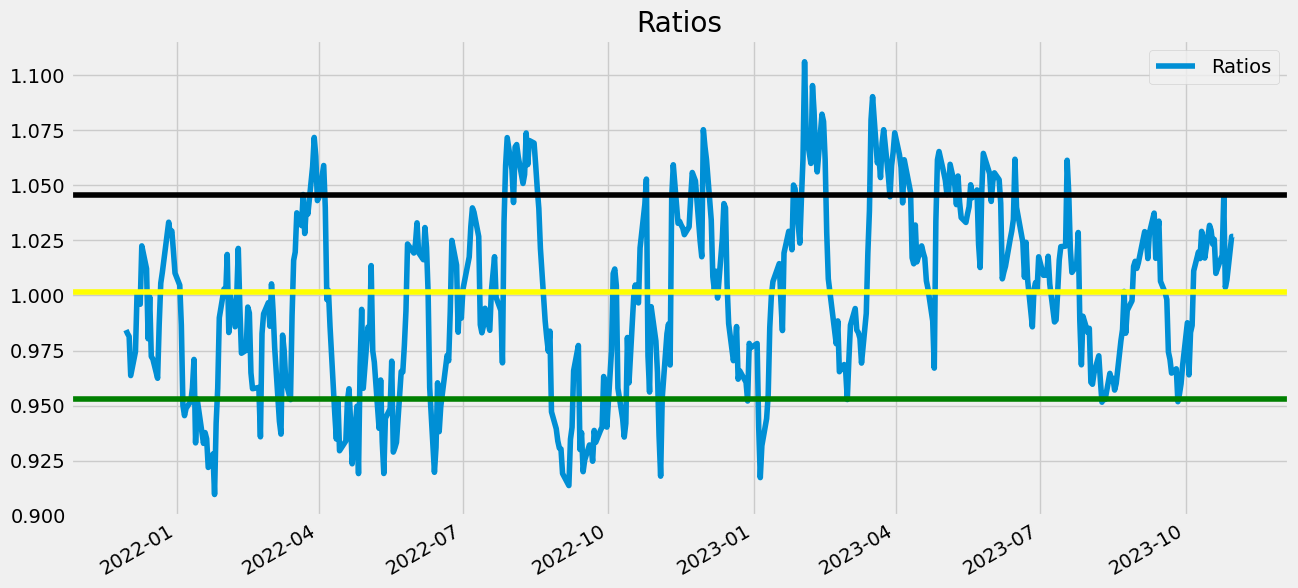

In [ ]:
#Plot the ratios
plt.figure(figsize=(14,7))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend = True)
plt.axhline(percentile_values[0], c='green', label = '15th percentile')
plt.axhline(percentile_values[2], c='yellow', label = '50th percentile')
plt.axhline(percentile_values[-1], c='black', label = '85th percentile')

In [ ]:
#Create buy ad sell signals for the stragety
sell = percentile_values[-1] #The 85th percentile where we want to sell
buy = percentile_values[0] #The 15th perentile where we want to buy
#Put -1 where the ratio is greateer than the percentile to sell and nan otherwise
df['Positions'] = np.where(df.Ratios > sell, -1, np.nan)
#Put 1 where the ratio is less than the percentile to buy and put the current value othersiese
df['Positions'] = np.where(df.Ratios < buy, 1, df['Positions'])
#Use ffill to fill the missing values in the data frame. ffill stands for forward fill
df['Positions'] = df['Positions'].ffill()

#Get the buy and sell signals
df['Buy'] = np.where(df.Positions == 1, df['Close'], np.nan)
df['Sell'] = np.where(df.Positions == -1, df['Close'], np.nan)

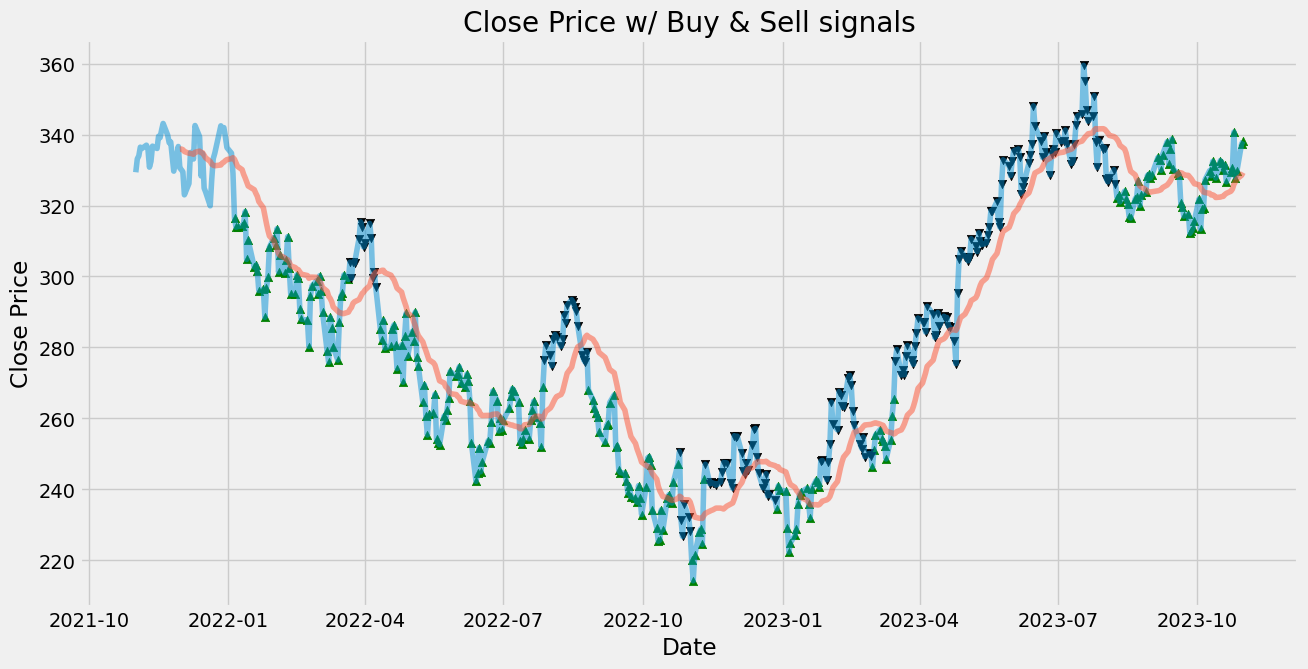

In [ ]:
#Visualize the buy and sell signals along with the close price
plt.figure(figsize=(14,7))
plt.title('Close Price w/ Buy & Sell signals')
plt.plot(df['Close'], alpha = 0.5, label= 'Close')
plt.plot(df['SMA'], alpha = 0.5, label= 'SMA')
plt.scatter(df.index, df['Buy'], color = 'green', label = 'Buy Signal', marker='^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'black', label = 'Sell Signal', marker='v', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
#Calculate the returns for the Mean Reversion Strategy
df['Strategy_Returns'] = df.Positions.shift(1) * df.Log_Returns
df['Strategy_Returns']

2021-11-01         NaN
2021-11-02         NaN
2021-11-03         NaN
2021-11-04         NaN
2021-11-05         NaN
                ...   
2023-10-25    0.030217
2023-10-26   -0.038236
2023-10-27    0.005838
2023-10-30    0.022486
2023-10-31    0.002369
Name: Strategy_Returns, Length: 503, dtype: float64

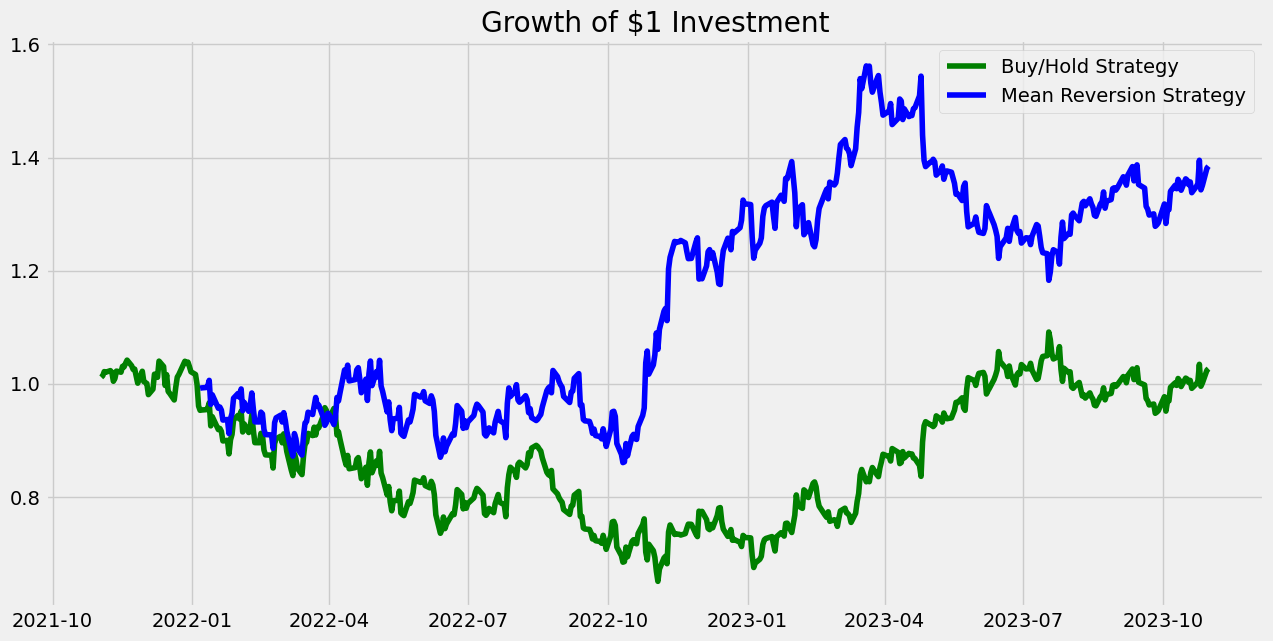

In [ ]:
#Plot the cumulative log returns & the cumulative Mean Reversion Strategy
plt.figure(figsize=(14,7))
plt.title('Growth of $1 Investment')
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(), c = 'green',label = 'Buy/Hold Strategy' )
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(), c = 'blue',label = 'Mean Reversion Strategy' )
plt.legend()


In [ ]:
#Print the returns for both strategies
print('Buy & Hold Strategy Returns:', np.exp(df['Log_Returns'].dropna()).cumprod()[-1] - 1)
print('Mean Reversion Strategy Returns:', np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1] - 1)


Buy & Hold Strategy Returns: 0.026535477222202397
Mean Reversion Strategy Returns: 0.38465511494447835
